<a href="https://www.kaggle.com/code/rinichristy/king-county-house-sale-price-prediction?scriptVersionId=95975650" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **King County House Sale Price Prediction**
---------------------------------------------------------
**Part: 3 of King County House Sale**

The aim of this project is to:<br></br>
[Part 1. Explore & Visualize the King County House sale data](https://www.kaggle.com/code/rinichristy/kc-data-exploration-and-visualization);<br> 
[Part 2. Statistical Analysis of the data](https://www.kaggle.com/code/rinichristy/statistical-analysis-of-kc-house-sale-data);<br>
[Part 3. Build various regression models to predict the house sale price](https://www.kaggle.com/rinichristy/king-county-house-sale-price-prediction); <br>
[Part 4. K-means, K-medoids and DBSCAN Cluster analysis KC data.](https://www.kaggle.com/code/rinichristy/cluster-analysis-of-kc-data) <br>
[Part 5. Classification Prediction of K-medoids clusters of KC House Sale Data](https://www.kaggle.com/rinichristy/prediction-of-k-medoids-clusters-of-kc-data)

## **Table of Contents**

  * [Data Set Information: King County House Sale Data Set](#Dataset)<br>
  * [Data Exploration](#Explore)<br>
  * [Data Preprocessing](#Preprocessing)<br>
  * [Feature selection using Feature Importance](#Selection)<br>
  * [Model Development](#Model)

## **Import the required libraries**

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

## **Load the dataset**

In [2]:
df = pd.read_csv("../input/kc-house/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## **Dataset Information:**<a name ='Dataset'></a>
The King County House sale dataset contains information regarding houses sold during the one year period ranging from May 2014 to May 2015. 

The dataset contains the following information:

| Features |  Description|
|----------------|------------------|
 |Id|            Unique Id for each house sold     |
|Date|         Date of House sale     |
|price |        House sale price     |
|bedrooms|   Number of bedrooms     |
|bathrooms|    Number of bathrooms, where .5 accounts for a bathroom with a toilet but no shower |
|sqft_living|    Square footage of interior living space of the house |
|sqft_lot|           Land area in square feet|
|floors|            Number of floors |
|waterfront|    Label to indicate whether the house was with waterfront or not|
|view|            Labels from 0 to 4 to indicate the view of house.|
|condition|     Labels from 1 to 5 to indicate the condition of the house|
|grade|            Labels from 1 to 13 to indicate the quality levels of construction and design, with 1 to 3 falls in the lowest level, 7 in the average label, and 11-13 in the highest quality level.|
|sqft_above|           Above ground level interior housing space in square feet. |
|sqft_basement| Below ground level interior housing space in square feet. |
|yr_built|            The year of construction of the house ranging from 1900 to 2015     |
|yr_renovated|    The year of last renovation of the house ranging from 1934 to 2015|
|zipcode | Zipcode area of the house|
|lat|   Latitude |
|long|  Longitude |
|sqft_living15| The interior living space in square feet for the nearest 15 neighbors|
|sqft_lot15| The land area in square feet for the nearest 15 neighbors |

## **Data Preprocessing** <a name = 'Preprocessing'></a>

In [3]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### **Outlier Removal**

In [4]:
df[df['bedrooms']== 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [5]:
df['price'].mean()/df['bedrooms'].mean()

160223.52936009006

It seems that the house with number of bedrooms 33 is an outlier. Checking the row for that value it was a 1620 square feet house with 1.75 bathrooms and a sale value of 640000. The average price per bedroom house calculated is 160223.5. So this entry is unreliable and is omitted from further analysis.  

In [6]:
df.drop(15870, axis = 0, inplace = True)
# reset index, because a row is droped.
df.reset_index(drop=True, inplace = True)
df.shape

(21612, 21)

### **Checking for Missing Values**

In [7]:
df[df.columns[df.isnull().sum()>0]].isnull().sum()

Series([], dtype: float64)

No missing values detected.

### **Feature Engineering from Date**
Extracting new features from date column adds extra dimension to the data. Features like date, month, year, day of week, month end or not etc can be extracted by splitting the date feature.   

In [8]:
# Convert to date time object
df['date'] = pd.to_datetime(df['date'])
df['date'].head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

In [9]:
df['Date'] = df['date'].astype('str').apply(lambda x: x.split('-')[2])
df['Month'] = df['date'].apply(lambda x:x.month)
df['Year'] = df['date'].apply(lambda x:x.year)
df['Day of Week'] = df['date'].apply(lambda x: x.dayofweek)
df['Date'] = df['Date'].astype('int')
df['monthend'] = df['Date'].apply(lambda x: 1 if (x>10)  else 0)
df['monthbeginning'] = df['Date'].apply(lambda x: 1 if (x<10)  else 0)
df.drop(['date', 'id'], axis = 1, inplace = True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,lat,long,sqft_living15,sqft_lot15,Date,Month,Year,Day of Week,monthend,monthbeginning
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,47.5112,-122.257,1340,5650,13,10,2014,0,1,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,47.7210,-122.319,1690,7639,9,12,2014,1,0,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,47.7379,-122.233,2720,8062,25,2,2015,2,1,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,47.5208,-122.393,1360,5000,9,12,2014,1,0,1
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,47.6168,-122.045,1800,7503,18,2,2015,2,1,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21612 entries, 0 to 21611
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           21612 non-null  float64
 1   bedrooms        21612 non-null  int64  
 2   bathrooms       21612 non-null  float64
 3   sqft_living     21612 non-null  int64  
 4   sqft_lot        21612 non-null  int64  
 5   floors          21612 non-null  float64
 6   waterfront      21612 non-null  int64  
 7   view            21612 non-null  int64  
 8   condition       21612 non-null  int64  
 9   grade           21612 non-null  int64  
 10  sqft_above      21612 non-null  int64  
 11  sqft_basement   21612 non-null  int64  
 12  yr_built        21612 non-null  int64  
 13  yr_renovated    21612 non-null  int64  
 14  zipcode         21612 non-null  int64  
 15  lat             21612 non-null  float64
 16  long            21612 non-null  float64
 17  sqft_living15   21612 non-null 

## **Feature selection using Feature Importance**<a name ='Selection'></a>
Feature importance can be used to improve a predictive model. Feature importance refers to techniques to assign the importance score to input features based on how useful they are at predicting a target variable. Based on these scores those features with (lowest scores) can be deleted and those features with highest scores can be retained for predicting the output of the model.


In [11]:
from sklearn import preprocessing
columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'Date', 'Month', 'Year', 'Day of Week',
       'monthend', 'monthbeginning']
df= pd.DataFrame(preprocessing.StandardScaler().fit(df).transform(df),columns = columns)

# define dataset
X = df.drop('price', axis = 1)
y = df['price']

Features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'Date', 'Month', 'Year', 'Day of Week',
       'monthend', 'monthbeginning']

In [12]:
# define the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
FeatureImportance = pd.DataFrame(importance, columns = ["feature_importances"])
FeatureImportance['Features'] = Features
FeatureImportance = FeatureImportance[['Features','feature_importances']]
FeatureImportance = FeatureImportance.sort_values(by = 'feature_importances', ascending = False)
FeatureImportance

,Features,feature_importances
9,sqft_above,5.039742e+11
10,sqft_basement,2.693526e+11
8,grade,3.059337e-01
14,lat,2.279445e-01
5,waterfront,1.371942e-01
6,view,1.092373e-01
1,bathrooms,8.922761e-02
7,condition,4.898999e-02
20,Year,4.679585e-02
16,sqft_living15,4.096714e-02


In [13]:
FeatureImportance = FeatureImportance[abs(FeatureImportance['feature_importances'])>8.922761e-02]
FeatureImportance

,Features,feature_importances
9,sqft_above,5.039742e+11
10,sqft_basement,2.693526e+11
8,grade,3.059337e-01
14,lat,2.279445e-01
5,waterfront,1.371942e-01
6,view,1.092373e-01
1,bathrooms,8.922761e-02
0,bedrooms,-9.834473e-02
11,yr_built,-2.105037e-01
2,sqft_living,-5.589683e+11


## **Models Development**<a name = 'Model'></a>

The following algorithms are going to be used to build regression models:<br>
* Linear Regressor
* Ridge Regressor
* Lasso Regressor
* ElasticNet Regressor
* KNeighbors Regressor
* Support Vector Regressor
* Decision Tree Regressor
* Extra Trees Regressor
* Random Forest Regressor
* Bagging Regressor
* AdaBoost Regressor
* Gradient Boosting Regressor
* XGB Regressor
* CatBoost Regressor
* Artificial Neural Network


### **Linear Regression Model**
Appyling features with highest scores obtained from feature importance.

In [14]:
FeatureImportance['Features'].values

array(['sqft_above', 'sqft_basement', 'grade', 'lat', 'waterfront',
       'view', 'bathrooms', 'bedrooms', 'yr_built', 'sqft_living'],
      dtype=object)

In [15]:
X = df[['sqft_above', 'sqft_basement', 'sqft_living', 'grade', 'lat', 'waterfront',
       'view', 'bathrooms', 'bedrooms', 'yr_built']]
y = df['price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
from sklearn import linear_model
mlm = linear_model.LinearRegression()
mlm.fit (X_train, y_train)

Yhat_mlm = mlm.predict(X_test)
k = X_test.shape[1]
n = len(X_test)

from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE) of Multiple Linear regression:', metrics.mean_absolute_error(y_test, Yhat_mlm))
print('Mean Squared Error(MSE) of Multiple Linear regression:', metrics.mean_squared_error(y_test, Yhat_mlm))
print('Root Mean Squared Error (RMSE) of Multiple Linear regression:', np.sqrt(metrics.mean_squared_error(y_test, Yhat_mlm)))
# Explained variance score: 1 is perfect prediction
print('Variance score of Multiple Linear regression: %.2f' % mlm.score(X_train, y_train))
print('Explained Variance Score (EVS) of Multiple Linear regression:',explained_variance_score(y_test, Yhat_mlm))
#Residual sum of squares (rss)
print("Residual sum of squares of Multiple Linear regression: %.2f" % np.mean((Yhat_mlm - y_test) ** 2))
print('R2 of Multiple Linear regression:',metrics.r2_score(y_test, Yhat_mlm))
print('R2 rounded of Multiple Linear regression:',(metrics.r2_score(y_test, Yhat_mlm)).round(2))
r2 = r2_score(y_test, Yhat_mlm)
r2_rounded = r2_score(y_test, Yhat_mlm).round(2)
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('Adjusted_r2 of Multiple Linear regression: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))
accuracy = mlm.score(X_test, y_test)
print("Accuracy of Multiple Linear regression: {}".format(accuracy))

Mean Absolute Error(MAE) of Multiple Linear regression: 0.3514571533666653
Mean Squared Error(MSE) of Multiple Linear regression: 0.3239369035324837
Root Mean Squared Error (RMSE) of Multiple Linear regression: 0.5691545515345403
Variance score of Multiple Linear regression: 0.69
Explained Variance Score (EVS) of Multiple Linear regression: 0.6784787497737075
Residual sum of squares of Multiple Linear regression: 0.32
R2 of Multiple Linear regression: 0.6784757483668249
R2 rounded of Multiple Linear regression: 0.68
Adjusted_r2 of Multiple Linear regression:  0.678
Accuracy of Multiple Linear regression: 0.6784757483668249


### **Ridge Regression Model**

In [16]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit (X_train, y_train)
Yhat_ridge = ridge.predict(X_test)
k = X_test.shape[1]
n = len(X_test)

from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE) of Ridge regression:', metrics.mean_absolute_error(y_test, Yhat_ridge))
print('Mean Squared Error(MSE) of Ridge regression:', metrics.mean_squared_error(y_test, Yhat_ridge))
print('Root Mean Squared Error (RMSE) of Ridge regression:', np.sqrt(metrics.mean_squared_error(y_test, Yhat_ridge)))
# Explained variance score: 1 is perfect prediction
print('Variance score of Ridge regression: %.2f' % ridge.score(X_train, y_train))
print('Explained Variance Score (EVS) of Ridge regression:',explained_variance_score(y_test, Yhat_ridge))
#Residual sum of squares (rss)
print("Residual sum of squares of Ridge regression: %.2f" % np.mean((Yhat_ridge - y_test) ** 2))
print('R2 of Ridge regression:',metrics.r2_score(y_test, Yhat_ridge))
print('R2 rounded of Ridge regression:',(metrics.r2_score(y_test, Yhat_ridge)).round(2))
r2 = r2_score(y_test, Yhat_ridge)
r2_rounded = r2_score(y_test, Yhat_ridge).round(2)
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('Adjusted_r2 of Ridge regression: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))
accuracy = ridge.score(X_test, y_test)
print("Accuracy of Ridge regression: {}".format(accuracy))

Mean Absolute Error(MAE) of Ridge regression: 0.3514515745523843
Mean Squared Error(MSE) of Ridge regression: 0.3239373201793203
Root Mean Squared Error (RMSE) of Ridge regression: 0.5691549175570042
Variance score of Ridge regression: 0.69
Explained Variance Score (EVS) of Ridge regression: 0.6784783374364518
Residual sum of squares of Ridge regression: 0.32
R2 of Ridge regression: 0.6784753348231352
R2 rounded of Ridge regression: 0.68
Adjusted_r2 of Ridge regression:  0.678
Accuracy of Ridge regression: 0.6784753348231352


### **Lasso Regression Model**

In [17]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit (X_train, y_train)
Yhat_lasso = lasso.predict(X_test)
k = X_test.shape[1]
n = len(X_test)

from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE) of Lasso regression:', metrics.mean_absolute_error(y_test, Yhat_lasso))
print('Mean Squared Error(MSE) of Lasso regression:', metrics.mean_squared_error(y_test, Yhat_lasso))
print('Root Mean Squared Error (RMSE) of Lasso regression:', np.sqrt(metrics.mean_squared_error(y_test, Yhat_lasso)))
# Explained variance score: 1 is perfect prediction
print('Variance score of Lasso regression: %.2f' % lasso.score(X_train, y_train))
print('Explained Variance Score (EVS) of Lasso regression:',explained_variance_score(y_test, Yhat_lasso))
#Residual sum of squares (rss)
print("Residual sum of squares of Lasso regression: %.2f" % np.mean((Yhat_lasso - y_test) ** 2))
print('R2 of Lasso regression:',metrics.r2_score(y_test, Yhat_lasso))
print('R2 rounded of Lasso regression:',(metrics.r2_score(y_test, Yhat_lasso)).round(2))
r2 = r2_score(y_test, Yhat_lasso)
r2_rounded = r2_score(y_test, Yhat_lasso).round(2)
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('Adjusted_r2 of Lasso regression: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))
accuracy = lasso.score(X_test, y_test)
print("Accuracy of Lasso regression: {}".format(accuracy))
r2_rounded = r2_score(y_test, Yhat_lasso).round(2)
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('Adjusted_r2 of Lasso regression: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))
accuracy = lasso.score(X_test, y_test)
print("Accuracy of Lasso regression: {}".format(accuracy))

Mean Absolute Error(MAE) of Lasso regression: 0.6332778979142172
Mean Squared Error(MSE) of Lasso regression: 1.0077283695172676
Root Mean Squared Error (RMSE) of Lasso regression: 1.0038567475079638
Variance score of Lasso regression: 0.00
Explained Variance Score (EVS) of Lasso regression: 0.0
Residual sum of squares of Lasso regression: 1.01
R2 of Lasso regression: -0.0002229024396052104
R2 rounded of Lasso regression: -0.0
Adjusted_r2 of Lasso regression:  -0.003
Accuracy of Lasso regression: -0.0002229024396052104
Adjusted_r2 of Lasso regression:  -0.003
Accuracy of Lasso regression: -0.0002229024396052104


### **ElasticNet Regression Model**

In [18]:
from sklearn.linear_model import ElasticNet
ElasticNet = ElasticNet()
ElasticNet.fit (X_train, y_train)
Yhat_ElasticNet = ElasticNet.predict(X_test)
k = X_test.shape[1]
n = len(X_test)

from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE) of ElasticNet regression:', metrics.mean_absolute_error(y_test, Yhat_ElasticNet))
print('Mean Squared Error(MSE) of ElasticNet regression:', metrics.mean_squared_error(y_test, Yhat_ElasticNet))
print('Root Mean Squared Error (RMSE) of ElasticNet regression:', np.sqrt(metrics.mean_squared_error(y_test, Yhat_ElasticNet)))
# Explained variance score: 1 is perfect prediction
print('Variance score of ElasticNet regression: %.2f' % ElasticNet.score(X_train, y_train))
print('Explained Variance Score (EVS) of ElasticNet regression:',explained_variance_score(y_test, Yhat_ElasticNet))
#Residual sum of squares (rss)
print("Residual sum of squares of ElasticNet regression: %.2f" % np.mean((Yhat_ElasticNet - y_test) ** 2))
print('R2 of ElasticNet regression:',metrics.r2_score(y_test, Yhat_ElasticNet))
print('R2 rounded of ElasticNet regression:',(metrics.r2_score(y_test, Yhat_ElasticNet)).round(2))
r2 = r2_score(y_test, Yhat_ElasticNet)
r2_rounded = r2_score(y_test, Yhat_ElasticNet).round(2)
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('Adjusted_r2 of ElasticNet regression: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))
accuracy = ElasticNet.score(X_test, y_test)
print("Accuracy of ElasticNet regression: {}".format(accuracy))


Mean Absolute Error(MAE) of ElasticNet regression: 0.5530788384341455
Mean Squared Error(MSE) of ElasticNet regression: 0.8078472731333383
Root Mean Squared Error (RMSE) of ElasticNet regression: 0.898803244950383
Variance score of ElasticNet regression: 0.20
Explained Variance Score (EVS) of ElasticNet regression: 0.1983293650380945
Residual sum of squares of ElasticNet regression: 0.81
R2 of ElasticNet regression: 0.19816949814718665
R2 rounded of ElasticNet regression: 0.2
Adjusted_r2 of ElasticNet regression:  0.196
Accuracy of ElasticNet regression: 0.19816949814718665


### **K Neighbors Regression Model**

In [19]:
from sklearn.neighbors import KNeighborsRegressor
KNR = KNeighborsRegressor()
KNR.fit (X_train, y_train)
Yhat_KNR = KNR.predict(X_test)
k = X_test.shape[1]
n = len(X_test)

from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE) of K Neighbors regression:', metrics.mean_absolute_error(y_test, Yhat_KNR))
print('Mean Squared Error(MSE) of K Neighbors regression:', metrics.mean_squared_error(y_test, Yhat_KNR))
print('Root Mean Squared Error (RMSE) of K Neighbors regression:', np.sqrt(metrics.mean_squared_error(y_test, Yhat_KNR)))
# Explained variance score: 1 is perfect prediction
print('Variance score of K Neighbors regression: %.2f' % KNR.score(X_train, y_train))
print('Explained Variance Score (EVS) of K Neighbors regression:',explained_variance_score(y_test, Yhat_KNR))
#Residual sum of squares (rss)
print("Residual sum of squares of K Neighbors regression: %.2f" % np.mean((Yhat_KNR - y_test) ** 2))
print('R2 of K Neighbors regression:',metrics.r2_score(y_test, Yhat_KNR))
print('R2 rounded of K Neighbors regression:',(metrics.r2_score(y_test, Yhat_KNR)).round(2))
r2 = r2_score(y_test, Yhat_KNR)
r2_rounded = r2_score(y_test, Yhat_KNR).round(2)
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('Adjusted_r2 of K Neighbors regression: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))
accuracy = KNR.score(X_test, y_test)
print("Accuracy of K Neighbors regression: {}".format(accuracy))


Mean Absolute Error(MAE) of K Neighbors regression: 0.2711200034938476
Mean Squared Error(MSE) of K Neighbors regression: 0.25395326177033023
Root Mean Squared Error (RMSE) of K Neighbors regression: 0.5039377558492023
Variance score of K Neighbors regression: 0.84
Explained Variance Score (EVS) of K Neighbors regression: 0.748349159013606
Residual sum of squares of K Neighbors regression: 0.25
R2 of K Neighbors regression: 0.7479381584805409
R2 rounded of K Neighbors regression: 0.75
Adjusted_r2 of K Neighbors regression:  0.747
Accuracy of K Neighbors regression: 0.7479381584805409


### **Support Vector Regression Model**

In [20]:
from sklearn.svm import SVR
SVR = SVR()
SVR.fit (X_train, y_train)
Yhat_SVR = SVR.predict(X_test)

k = X_test.shape[1]
n = len(X_test)

from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE) of Support Vector regression:', metrics.mean_absolute_error(y_test, Yhat_SVR))
print('Mean Squared Error(MSE) of Support Vector regression:', metrics.mean_squared_error(y_test, Yhat_SVR))
print('Root Mean Squared Error (RMSE) of Support Vector regression:', np.sqrt(metrics.mean_squared_error(y_test, Yhat_SVR)))
# Explained variance score: 1 is perfect prediction
print('Variance score of Support Vector regression: %.2f' % SVR.score(X_train, y_train))
print('Explained Variance Score (EVS) of Support Vector regression:',explained_variance_score(y_test, Yhat_SVR))
#Residual sum of squares (rss)
print("Residual sum of squares of Support Vector regression: %.2f" % np.mean((Yhat_SVR - y_test) ** 2))
print('R2 of Support Vector regression:',metrics.r2_score(y_test, Yhat_SVR))
print('R2 rounded of Support Vector regression:',(metrics.r2_score(y_test, Yhat_SVR)).round(2))
r2 = r2_score(y_test, Yhat_SVR)
r2_rounded = r2_score(y_test, Yhat_SVR).round(2)
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('Adjusted_r2 of Support Vector regression: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))
accuracy = SVR.score(X_test, y_test)
print("Accuracy of Support Vector regression: {}".format(accuracy))

Mean Absolute Error(MAE) of Support Vector regression: 0.2582334394935995
Mean Squared Error(MSE) of Support Vector regression: 0.27907234050097524
Root Mean Squared Error (RMSE) of Support Vector regression: 0.5282729791509075
Variance score of Support Vector regression: 0.77
Explained Variance Score (EVS) of Support Vector regression: 0.7268472281918648
Residual sum of squares of Support Vector regression: 0.28
R2 of Support Vector regression: 0.7230061643097205
R2 rounded of Support Vector regression: 0.72
Adjusted_r2 of Support Vector regression:  0.722
Accuracy of Support Vector regression: 0.7230061643097205


### **Decision Tree Regression Model**

In [21]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit (X_train, y_train)
Yhat_DTR = DTR.predict(X_test)

k = X_test.shape[1]
n = len(X_test)

from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE) of Decision Tree regression:', metrics.mean_absolute_error(y_test, Yhat_DTR))
print('Mean Squared Error(MSE) of Decision Tree regression:', metrics.mean_squared_error(y_test, Yhat_DTR))
print('Root Mean Squared Error (RMSE) of Decision Tree regression:', np.sqrt(metrics.mean_squared_error(y_test, Yhat_DTR)))
# Explained variance score: 1 is perfect prediction
print('Variance score of Decision Tree regression: %.2f' % DTR.score(X_train, y_train))
print('Explained Variance Score (EVS) of Decision Tree regression:',explained_variance_score(y_test, Yhat_DTR))
#Residual sum of squares (rss)
print("Residual sum of squares of Decision Tree regression: %.2f" % np.mean((Yhat_DTR - y_test) ** 2))
print('R2 of Decision Tree regression:',metrics.r2_score(y_test, Yhat_DTR))
print('R2 rounded of Decision Tree regression:',(metrics.r2_score(y_test, Yhat_DTR)).round(2))
r2 = r2_score(y_test, Yhat_DTR)
r2_rounded = r2_score(y_test, Yhat_DTR).round(2)
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('Adjusted_r2 of Decision Tree regression: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))
accuracy = DTR.score(X_test, y_test)
print("Accuracy of Decision Tree regression: {}".format(accuracy))

Mean Absolute Error(MAE) of Decision Tree regression: 0.31695306689046243
Mean Squared Error(MSE) of Decision Tree regression: 0.34400370624865384
Root Mean Squared Error (RMSE) of Decision Tree regression: 0.5865182914868503
Variance score of Decision Tree regression: 1.00
Explained Variance Score (EVS) of Decision Tree regression: 0.658635316408231
Residual sum of squares of Decision Tree regression: 0.34
R2 of Decision Tree regression: 0.6585584013290855
R2 rounded of Decision Tree regression: 0.66
Adjusted_r2 of Decision Tree regression:  0.658
Accuracy of Decision Tree regression: 0.6585584013290855


### **Extra Trees Regression Model**

In [22]:
from sklearn.ensemble import ExtraTreesRegressor
ETR = ExtraTreesRegressor()
ETR.fit (X_train, y_train)
Yhat_ETR = ETR.predict(X_test)

k = X_test.shape[1]
n = len(X_test)

from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE) of Extra Trees regression:', metrics.mean_absolute_error(y_test, Yhat_ETR))
print('Mean Squared Error(MSE) of Extra Trees regression:', metrics.mean_squared_error(y_test, Yhat_ETR))
print('Root Mean Squared Error (RMSE) of Extra Trees regression:', np.sqrt(metrics.mean_squared_error(y_test, Yhat_ETR)))
# Explained variance score: 1 is perfect prediction
print('Variance score of Extra Trees regression: %.2f' % ETR.score(X_train, y_train))
print('Explained Variance Score (EVS) of Extra Trees regression:',explained_variance_score(y_test, Yhat_ETR))
#Residual sum of squares (rss)
print("Residual sum of squares of Extra Trees regression: %.2f" % np.mean((Yhat_ETR - y_test) ** 2))
print('R2 of Extra Trees regression:',metrics.r2_score(y_test, Yhat_ETR))
print('R2 rounded of Extra Trees regression:',(metrics.r2_score(y_test, Yhat_ETR)).round(2))
r2 = r2_score(y_test, Yhat_ETR)
r2_rounded = r2_score(y_test, Yhat_ETR).round(2)
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('Adjusted_r2 of Extra Trees regression: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))
accuracy = ETR.score(X_test, y_test)
print("Accuracy of Extra Trees regression: {}".format(accuracy))

Mean Absolute Error(MAE) of Extra Trees regression: 0.2387581477522012
Mean Squared Error(MSE) of Extra Trees regression: 0.19884172624962995
Root Mean Squared Error (RMSE) of Extra Trees regression: 0.4459167256894834
Variance score of Extra Trees regression: 1.00
Explained Variance Score (EVS) of Extra Trees regression: 0.8027091283001786
Residual sum of squares of Extra Trees regression: 0.20
R2 of Extra Trees regression: 0.8026392284155117
R2 rounded of Extra Trees regression: 0.8
Adjusted_r2 of Extra Trees regression:  0.802
Accuracy of Extra Trees regression: 0.8026392284155117


### **Random Forest Regression Model**

In [23]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor()
RFR.fit (X_train, y_train)
Yhat_RFR = RFR.predict(X_test)

k = X_test.shape[1]
n = len(X_test)

from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE) of Random Forest regression:', metrics.mean_absolute_error(y_test, Yhat_RFR))
print('Mean Squared Error(MSE) of Random Forest regression:', metrics.mean_squared_error(y_test, Yhat_RFR))
print('Root Mean Squared Error (RMSE) of Random Forest regression:', np.sqrt(metrics.mean_squared_error(y_test, Yhat_RFR)))
# Explained variance score: 1 is perfect prediction
print('Variance score of Random Forest regression: %.2f' % RFR.score(X_train, y_train))
print('Explained Variance Score (EVS) of Random Forest regression:',explained_variance_score(y_test, Yhat_RFR))
#Residual sum of squares (rss)
print("Residual sum of squares of Random Forest regression: %.2f" % np.mean((Yhat_RFR - y_test) ** 2))
print('R2 of Random Forest regression:',metrics.r2_score(y_test, Yhat_RFR))
print('R2 rounded of Random Forest regression:',(metrics.r2_score(y_test, Yhat_RFR)).round(2))
r2 = r2_score(y_test, Yhat_RFR)
r2_rounded = r2_score(y_test, Yhat_RFR).round(2)
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('Adjusted_r2 of Random Forest regression: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))
accuracy = RFR.score(X_test, y_test)
print("Accuracy of Random Forest regression: {}".format(accuracy))

Mean Absolute Error(MAE) of Random Forest regression: 0.23810113429746002
Mean Squared Error(MSE) of Random Forest regression: 0.19571409182276547
Root Mean Squared Error (RMSE) of Random Forest regression: 0.4423958542106441
Variance score of Random Forest regression: 0.97
Explained Variance Score (EVS) of Random Forest regression: 0.805829192362174
Residual sum of squares of Random Forest regression: 0.20
R2 of Random Forest regression: 0.8057435685123445
R2 rounded of Random Forest regression: 0.81
Adjusted_r2 of Random Forest regression:  0.805
Accuracy of Random Forest regression: 0.8057435685123445


### **Bagging Regression Model**

In [24]:
from sklearn.ensemble import BaggingRegressor
Bagging = BaggingRegressor()
Bagging.fit (X_train, y_train)
Yhat_Bagging = Bagging.predict(X_test)

k = X_test.shape[1]
n = len(X_test)

from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE) of Bagging regression:', metrics.mean_absolute_error(y_test, Yhat_Bagging))
print('Mean Squared Error(MSE) of Bagging regression:', metrics.mean_squared_error(y_test, Yhat_Bagging))
print('Root Mean Squared Error (RMSE) of Bagging regression:', np.sqrt(metrics.mean_squared_error(y_test, Yhat_Bagging)))
# Explained variance score: 1 is perfect prediction
print('Variance score of Bagging regression: %.2f' % Bagging.score(X_train, y_train))
print('Explained Variance Score (EVS) of Bagging regression:',explained_variance_score(y_test, Yhat_Bagging))
#Residual sum of squares (rss)
print("Residual sum of squares of Bagging regression: %.2f" % np.mean((Yhat_Bagging - y_test) ** 2))
print('R2 of Bagging regression:',metrics.r2_score(y_test, Yhat_Bagging))
print('R2 rounded of Bagging regression:',(metrics.r2_score(y_test, Yhat_Bagging)).round(2))
r2 = r2_score(y_test, Yhat_Bagging)
r2_rounded = r2_score(y_test, Yhat_Bagging).round(2)
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('Adjusted_r2 of Bagging regression: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))
accuracy = Bagging.score(X_test, y_test)
print("Accuracy of Bagging regression: {}".format(accuracy))

Mean Absolute Error(MAE) of Bagging regression: 0.25167250772341115
Mean Squared Error(MSE) of Bagging regression: 0.221046412364504
Root Mean Squared Error (RMSE) of Bagging regression: 0.4701557320340825
Variance score of Bagging regression: 0.96
Explained Variance Score (EVS) of Bagging regression: 0.7807093754239949
Residual sum of squares of Bagging regression: 0.22
R2 of Bagging regression: 0.7805999207355871
R2 rounded of Bagging regression: 0.78
Adjusted_r2 of Bagging regression:  0.78
Accuracy of Bagging regression: 0.7805999207355871


### **AdaBoost Regression Model**

In [25]:
from sklearn.ensemble import AdaBoostRegressor
AdaBoost = AdaBoostRegressor()
AdaBoost.fit (X_train, y_train)
Yhat_AdaBoost = AdaBoost.predict(X_test)

k = X_test.shape[1]
n = len(X_test)

from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE) of AdaBoost regression:', metrics.mean_absolute_error(y_test, Yhat_AdaBoost))
print('Mean Squared Error(MSE) of AdaBoost regression:', metrics.mean_squared_error(y_test, Yhat_AdaBoost))
print('Root Mean Squared Error (RMSE) of AdaBoost regression:', np.sqrt(metrics.mean_squared_error(y_test, Yhat_AdaBoost)))
# Explained variance score: 1 is perfect prediction
print('Variance score of AdaBoost regression: %.2f' % AdaBoost.score(X_train, y_train))
print('Explained Variance Score (EVS) of AdaBoost regression:',explained_variance_score(y_test, Yhat_AdaBoost))
#Residual sum of squares (rss)
print("Residual sum of squares of AdaBoost regression: %.2f" % np.mean((Yhat_AdaBoost - y_test) ** 2))
print('R2 of AdaBoost regression:',metrics.r2_score(y_test, Yhat_AdaBoost))
print('R2 rounded of AdaBoost regression:',(metrics.r2_score(y_test, Yhat_AdaBoost)).round(2))
r2 = r2_score(y_test, Yhat_AdaBoost)
r2_rounded = r2_score(y_test, Yhat_AdaBoost).round(2)
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('Adjusted_r2 of AdaBoost regression: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))
accuracy = AdaBoost.score(X_test, y_test)
print("Accuracy of AdaBoost regression: {}".format(accuracy))

Mean Absolute Error(MAE) of AdaBoost regression: 0.6836551452884587
Mean Squared Error(MSE) of AdaBoost regression: 0.6444537954215852
Root Mean Squared Error (RMSE) of AdaBoost regression: 0.8027787960712373
Variance score of AdaBoost regression: 0.39
Explained Variance Score (EVS) of AdaBoost regression: 0.6797788607602826
Residual sum of squares of AdaBoost regression: 0.64
R2 of AdaBoost regression: 0.36034603644871177
R2 rounded of AdaBoost regression: 0.36
Adjusted_r2 of AdaBoost regression:  0.359
Accuracy of AdaBoost regression: 0.36034603644871177


### **Gradient Boosting Regression Model**

In [26]:
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor()
GB.fit (X_train, y_train)
Yhat_GB = GB.predict(X_test)

k = X_test.shape[1]
n = len(X_test)

from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE) of Gradient Boosting regression:', metrics.mean_absolute_error(y_test, Yhat_GB))
print('Mean Squared Error(MSE) of Gradient Boosting regression:', metrics.mean_squared_error(y_test, Yhat_GB))
print('Root Mean Squared Error (RMSE) of Gradient Boosting regression:', np.sqrt(metrics.mean_squared_error(y_test, Yhat_GB)))
# Explained variance score: 1 is perfect prediction
print('Variance score of Gradient Boosting regression: %.2f' % GB.score(X_train, y_train))
print('Explained Variance Score (EVS) of Gradient Boosting regression:',explained_variance_score(y_test, Yhat_GB))
#Residual sum of squares (rss)
print("Residual sum of squares of Gradient Boosting regression: %.2f" % np.mean((Yhat_GB - y_test) ** 2))
print('R2 of Gradient Boosting regression:',metrics.r2_score(y_test, Yhat_GB))
print('R2 rounded of Gradient Boosting regression:',(metrics.r2_score(y_test, Yhat_GB)).round(2))
r2 = r2_score(y_test, Yhat_GB)
r2_rounded = r2_score(y_test, Yhat_GB).round(2)
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('Adjusted_r2 of Gradient Boosting regression: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))
accuracy = GB.score(X_test, y_test)
print("Accuracy of Gradient Boosting regression: {}".format(accuracy))

Mean Absolute Error(MAE) of Gradient Boosting regression: 0.24750486191634044
Mean Squared Error(MSE) of Gradient Boosting regression: 0.18547868412229943
Root Mean Squared Error (RMSE) of Gradient Boosting regression: 0.43067236284941646
Variance score of Gradient Boosting regression: 0.86
Explained Variance Score (EVS) of Gradient Boosting regression: 0.8160418438102507
Residual sum of squares of Gradient Boosting regression: 0.19
R2 of Gradient Boosting regression: 0.8159027438491637
R2 rounded of Gradient Boosting regression: 0.82
Adjusted_r2 of Gradient Boosting regression:  0.815
Accuracy of Gradient Boosting regression: 0.8159027438491637


### **XGBoost Regression Model**

In [27]:
from xgboost import XGBRegressor
XGB = XGBRegressor()
XGB.fit (X_train, y_train)
Yhat_XGB = XGB.predict(X_test)

k = X_test.shape[1]
n = len(X_test)

from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE) of XG Boost regression:', metrics.mean_absolute_error(y_test, Yhat_XGB))
print('Mean Squared Error(MSE) of XG Boost regression:', metrics.mean_squared_error(y_test, Yhat_XGB))
print('Root Mean Squared Error (RMSE) of XG Boost regression:', np.sqrt(metrics.mean_squared_error(y_test, Yhat_XGB)))
# Explained variance score: 1 is perfect prediction
print('Variance score of XG Boost regression: %.2f' % XGB.score(X_train, y_train))
print('Explained Variance Score (EVS) of XG Boost regression:',explained_variance_score(y_test, Yhat_XGB))
#Residual sum of squares (rss)
print("Residual sum of squares of XG Boost regression: %.2f" % np.mean((Yhat_XGB - y_test) ** 2))
print('R2 of XG Boost regression:',metrics.r2_score(y_test, Yhat_XGB))
print('R2 rounded of XG Boost regression:',(metrics.r2_score(y_test, Yhat_XGB)).round(2))
r2 = r2_score(y_test, Yhat_XGB)
r2_rounded = r2_score(y_test, Yhat_XGB).round(2)
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('Adjusted_r2 of XG Boost regression: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))
accuracy = XGB.score(X_test, y_test)
print("Accuracy of XG Boost regression: {}".format(accuracy))

Mean Absolute Error(MAE) of XG Boost regression: 0.23836281277251506
Mean Squared Error(MSE) of XG Boost regression: 0.17716192460974253
Root Mean Squared Error (RMSE) of XG Boost regression: 0.42090607575769506
Variance score of XG Boost regression: 0.95
Explained Variance Score (EVS) of XG Boost regression: 0.8242802616660733
Residual sum of squares of XG Boost regression: 0.18
R2 of XG Boost regression: 0.8241575609111531
R2 rounded of XG Boost regression: 0.82
Adjusted_r2 of XG Boost regression:  0.824
Accuracy of XG Boost regression: 0.8241575609111531


### **CatBoost Regression Model**

In [28]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor(loss_function='RMSE', learning_rate = 0.1, max_depth = 5, n_estimators = 100, silent = True)
cat.fit(X_train, y_train)
Yhat_cat = cat.predict(X_test)

k = X_test.shape[1]
n = len(X_test)

from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE) of CatBoost regression:', metrics.mean_absolute_error(y_test, Yhat_cat))
print('Mean Squared Error(MSE) of CatBoost regression:', metrics.mean_squared_error(y_test, Yhat_cat))
print('Root Mean Squared Error (RMSE) of CatBoost regression:', np.sqrt(metrics.mean_squared_error(y_test, Yhat_cat)))
# Explained variance score: 1 is perfect prediction
print('Variance score of CatBoost regression: %.2f' % cat.score(X_train, y_train))
print('Explained Variance Score (EVS) of CatBoost regression:',explained_variance_score(y_test, Yhat_cat))
#Residual sum of squares (rss)
print("Residual sum of squares of CatBoost regression: %.2f" % np.mean((Yhat_cat - y_test) ** 2))
print('R2 of CatBoost regression:',metrics.r2_score(y_test, Yhat_cat))
print('R2 rounded of CatBoost regression:',(metrics.r2_score(y_test, Yhat_cat)).round(2))
r2 = r2_score(y_test, Yhat_cat)
r2_rounded = r2_score(y_test, Yhat_cat).round(2)
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('Adjusted_r2 of CatBoost regression: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))
accuracy = cat.score(X_test, y_test)
print("Accuracy of CatBoost regression: {}".format(accuracy))

Mean Absolute Error(MAE) of CatBoost regression: 0.24567186315616887
Mean Squared Error(MSE) of CatBoost regression: 0.18439295710100342
Root Mean Squared Error (RMSE) of CatBoost regression: 0.42941001048066335
Variance score of CatBoost regression: 0.86
Explained Variance Score (EVS) of CatBoost regression: 0.8171317952269121
Residual sum of squares of CatBoost regression: 0.18
R2 of CatBoost regression: 0.8169803844766852
R2 rounded of CatBoost regression: 0.82
Adjusted_r2 of CatBoost regression:  0.817
Accuracy of CatBoost regression: 0.8169803844766852


### **Artificial Neural Network**

2022-05-18 20:04:26.015826: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense (Dense)                (None, 16)                176       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


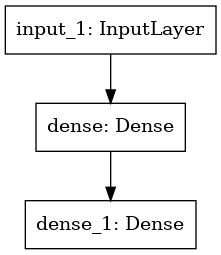

In [29]:
import tensorflow as tf
i = tf.keras.layers.Input(10)
ix = tf.keras.layers.Dense(16, activation='relu')(i)
z = tf.keras.layers.Dense(1)(ix)

model = tf.keras.Model(i, z)
model.compile(loss='mse', optimizer='sgd', metrics=['mse'])
model.summary()
tf.keras.utils.plot_model(model)

2022-05-18 20:04:27.451382: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
541/541 [==============================] - 1s 2ms/step - loss: 0.3411 - mse: 0.3411 - val_loss: 0.2920 - val_mse: 0.2920
Epoch 2/50
541/541 [==============================] - 1s 1ms/step - loss: 0.2756 - mse: 0.2756 - val_loss: 0.3036 - val_mse: 0.3036
Epoch 3/50
541/541 [==============================] - 1s 1ms/step - loss: 0.2668 - mse: 0.2668 - val_loss: 0.2735 - val_mse: 0.2735
Epoch 4/50
541/541 [==============================] - 1s 1ms/step - loss: 0.2591 - mse: 0.2591 - val_loss: 0.2781 - val_mse: 0.2781
Epoch 5/50
541/541 [==============================] - 1s 1ms/step - loss: 0.2584 - mse: 0.2584 - val_loss: 0.2695 - val_mse: 0.2695
Epoch 6/50
541/541 [==============================] - 1s 1ms/step - loss: 0.2529 - mse: 0.2529 - val_loss: 0.3011 - val_mse: 0.3011
Epoch 7/50
541/541 [==============================] - 1s 1ms/step - loss: 0.2553 - mse: 0.2553 - val_loss: 0.2687 - val_mse: 0.2687
Epoch 8/50
541/541 [==============================] - 1s 1ms/step - loss: 0.

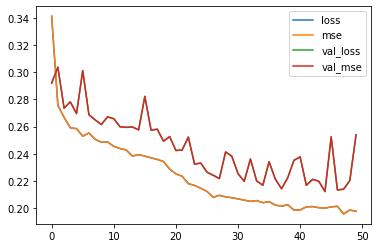

In [30]:
model.fit(X_train, y_train, validation_data=(X_test,y_test.values),epochs = 50)
losses = pd.DataFrame(model.history.history)
losses.plot();

In [31]:
#Deploy the model to make Predictions
Yhat_ANN = model.predict(X_test)

#Evaluation on Validation Data
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE) of Artificial Neural Network regression:', metrics.mean_absolute_error(y_test, Yhat_ANN))
print('Mean Squared Error(MSE) of Artificial Neural Network regression:', metrics.mean_squared_error(y_test, Yhat_ANN))
print('Root Mean Squared Error (RMSE) of Artificial Neural Network regression:', np.sqrt(metrics.mean_squared_error(y_test, Yhat_ANN)))
print('R2 of XArtificial Neural Network regression:',metrics.r2_score(y_test, Yhat_ANN))
print('R2 rounded of Artificial Neural Network regression:',(metrics.r2_score(y_test, Yhat_ANN)).round(2))
r2 = r2_score(y_test, Yhat_ANN)
r2_rounded = r2_score(y_test, Yhat_ANN).round(2)
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('Adjusted_r2 of Artificial Neural Network regression: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))

Mean Absolute Error(MAE) of Artificial Neural Network regression: 0.30235277827524626
Mean Squared Error(MSE) of Artificial Neural Network regression: 0.2538467918642548
Root Mean Squared Error (RMSE) of Artificial Neural Network regression: 0.5038321068215629
R2 of XArtificial Neural Network regression: 0.748043835408668
R2 rounded of Artificial Neural Network regression: 0.75
Adjusted_r2 of Artificial Neural Network regression:  0.747


## **Final Assessment of Models**<a name= 'Assessment'></a>

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [33]:
Models=[("Linear Regression",LinearRegression()),
        ("Ridge", Ridge()),
        ("Lasso", Lasso()),
        ("ElasticNet", ElasticNet()),
        ("KNR",KNeighborsRegressor()),
        ("SVR",SVR()),
        ("Decision Tree",DecisionTreeRegressor()),
        ("Extra Trees",ExtraTreesRegressor()),
        ("Random Forest",RandomForestRegressor()),
        ("Bagging",BaggingRegressor()),
        ("AdaBoost",AdaBoostRegressor()),
        ("GradientBoosting",GradientBoostingRegressor()),
        ("XGB",XGBRegressor()),
        ("CatBoost",CatBoostRegressor(loss_function='RMSE', learning_rate = 0.1, max_depth = 5, n_estimators = 100, silent = True))]

Model_output=[]
for name,model in Models:
    yhat=model.fit(X_train, y_train).predict(X_test)
    MAE = metrics.mean_absolute_error(y_test, yhat)
    MSE = metrics.mean_squared_error(y_test, yhat)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, yhat))
    Variance_score = model.score(X_train, y_train)
    Explained_Variance_score= explained_variance_score(y_test, yhat)
    R2_score = r2_score(y_test, yhat)
    Train_set_MAE = metrics.mean_absolute_error(y_train, model.predict(X_train))
    Model_output.append((name, Train_set_MAE, MAE,MSE,RMSE, Variance_score, Explained_Variance_score,R2_score))
    final_Report=pd.DataFrame(Model_output, columns=['Algorithm','Train_set_MAE', 'MAE', 'MSE', 'RMSE', 'Variance_score', 'Explained_Variance_score','R2 score'])
final_Report = final_Report.sort_values('R2 score', ascending = False, ignore_index=True)       
final_Report

,Algorithm,Train_set_MAE,MAE,MSE,RMSE,Variance_score,Explained_Variance_score,R2 score
0,XGB,0.155262,0.238363,0.177162,0.420906,0.949020,0.824280,0.824158
1,CatBoost,0.233212,0.245672,0.184393,0.429410,0.857426,0.817132,0.816980
2,GradientBoosting,0.230267,0.247774,0.186561,0.431928,0.862322,0.814963,0.814828
3,Extra Trees,0.002810,0.237586,0.194658,0.441200,0.999288,0.806853,0.806792
4,Random Forest,0.086451,0.239156,0.197080,0.443936,0.974108,0.804458,0.804388
5,Bagging,0.096667,0.247726,0.212904,0.461416,0.964563,0.788790,0.788681
6,KNR,0.216080,0.271120,0.253953,0.503938,0.844644,0.748349,0.747938
7,SVR,0.233437,0.258233,0.279072,0.528273,0.769031,0.726847,0.723006
8,Linear Regression,0.344369,0.351457,0.323937,0.569155,0.694203,0.678479,0.678476
9,Ridge,0.344363,0.351452,0.323937,0.569155,0.694203,0.678478,0.678475
